In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from model import Model
import torch
%matplotlib inline

In [ ]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

In [ ]:
net = Model()
net.loadModel()
net.loadData(bs=1)
#net.testModel()

cuda:0
Files already downloaded and verified


In [ ]:
classes = net.dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

True Label :7 frog


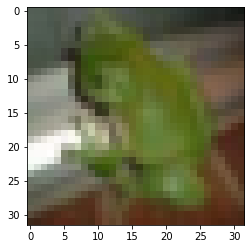

In [ ]:
import numpy as np
index = 7
img_src = net.testset[index][0]
img = net.testset[index][0] / 2 + 0.5     # unnormalize
label = net.testset[index][1]
npimg = img.numpy()
print('True Label :' + str(index) + ' ' + classes[label])
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [ ]:
type(img_src)

torch.Tensor

## Gaussian Noise

In [ ]:
sigma = 0.5
gauss = np.random.normal(0,sigma,(3,32,32)).reshape(3,32,32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


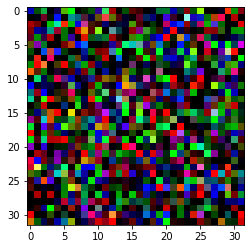

In [ ]:
plt.imshow(np.transpose(gauss, (1, 2, 0)))

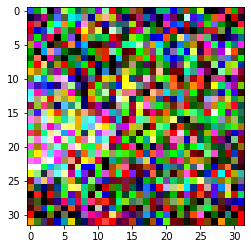

In [ ]:
noisy = gauss + npimg
noisy = np.clip(noisy,0,1)
plt.imshow(np.transpose(noisy, (1, 2, 0)))

In [ ]:
noisy = (noisy -0.5)*2
nt = torch.tensor(noisy, dtype=torch.float)
classes[net.identify(nt)]

'frog'

In [ ]:
n = 1000
sigma = 0.5
results = [0 for i in range(10)]
for i in range(n):
    gauss = np.random.normal(0,sigma,(3,32,32)).reshape(3,32,32)
    timg = torch.tensor(img_src.numpy()+gauss, dtype=torch.float)
    results[net.identify(timg)] += 1
    
results

[0, 0, 4, 0, 0, 0, 990, 0, 0, 6]

In [ ]:
classes[np.argmax(results)]

'frog'

## Laplace Noise

In [ ]:
laplace = np.random.laplace(0,sigma,(3,32,32)).reshape(3,32,32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


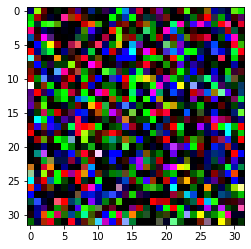

In [ ]:
plt.imshow(np.transpose(laplace, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


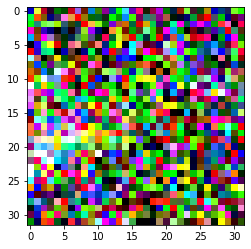

In [ ]:
noisy = laplace + npimg
plt.imshow(np.transpose(noisy, (1, 2, 0)))

In [ ]:
noisy = (noisy -0.5)*2
nt = torch.tensor(noisy, dtype=torch.float)
classes[net.identify(nt)]

'truck'

In [ ]:
n = 1000
sigma = 0.5
results = [0 for i in range(10)]
for i in range(n):
    laplace = np.random.laplace(0,sigma,(3,32,32)).reshape(3,32,32)
    timg = torch.tensor(img_src.numpy()+laplace, dtype=torch.float)
    results[net.identify(timg)] += 1
    
results

[0, 1, 7, 0, 0, 0, 953, 0, 0, 39]

In [ ]:
classes[np.argmax(results)]

'frog'

## Uniform Noise

In [ ]:
uni = np.random.uniform(-1,1,(3,32,32)).reshape(3,32,32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


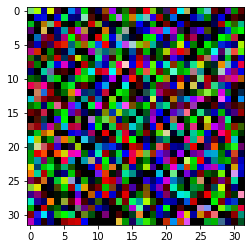

In [ ]:
plt.imshow(np.transpose(uni, (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


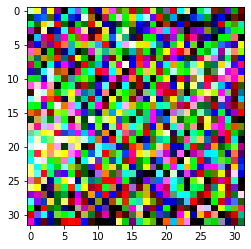

In [ ]:
noisy = uni + npimg
plt.imshow(np.transpose(noisy, (1, 2, 0)))

In [ ]:
noisy = (noisy -0.5)*2
nt = torch.tensor(noisy, dtype=torch.float)
classes[net.identify(nt)]

'frog'

In [ ]:
n = 1000
sigma = 0.5
results = [0 for i in range(10)]
for i in range(n):
    uni = np.random.uniform(-1,1,(3,32,32)).reshape(3,32,32)
    timg = torch.tensor(img_src.numpy()+uni, dtype=torch.float)
    results[net.identify(timg)] += 1
    
results

[0, 0, 0, 0, 0, 0, 986, 0, 0, 14]

In [ ]:
classes[np.argmax(results)]

'frog'

## CROP RESIZE

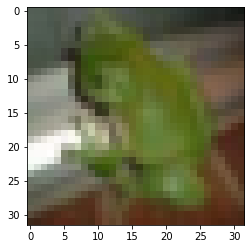

In [ ]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
import random
def randomCrop(x,cs=4):
    c, w, h = x.shape
    x = random.randint(0,cs)
    y = random.randint(0,cs)
    crop = img_src.numpy()[:,x:w+x-cs,y:w+y-cs]
    return crop

In [ ]:
crop = randomCrop(img_src.numpy())
crop.shape

(3, 28, 28)

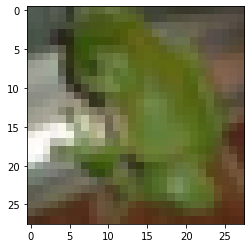

In [ ]:
plt.imshow(np.transpose(crop/2+0.5, (1, 2, 0)))

In [ ]:
from skimage.transform import resize
cropr = resize(crop, (3,32,32))
cropr.shape

(3, 32, 32)

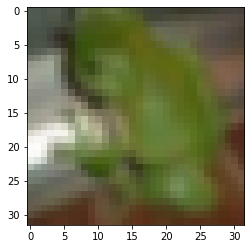

In [ ]:
plt.imshow(np.transpose(cropr/2+0.5, (1, 2, 0)))

In [ ]:
ct = torch.tensor(cropr, dtype=torch.float)
classes[net.identify(ct)]

'frog'

## Crop and fill

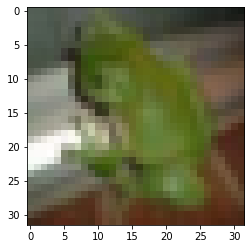

In [ ]:
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
crop = randomCrop(img_src.numpy())
crop.shape

(3, 28, 28)

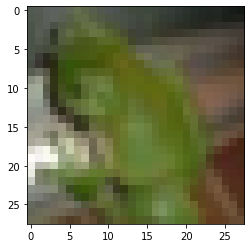

In [ ]:
plt.imshow(np.transpose(crop/2+0.5, (1, 2, 0)))

In [ ]:
cropf = np.stack([np.pad(crop[c,:,:],((2,2),(2,2)),mode='constant', constant_values=random.uniform(-1, 1)) for c in range(3)], axis=0)
cropf.shape

(3, 32, 32)

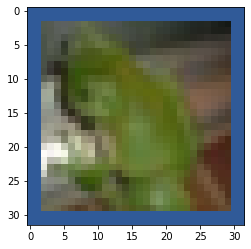

In [ ]:
plt.imshow(np.transpose(cropf/2+0.5, (1, 2, 0)))

In [ ]:
cf = torch.tensor(cropf, dtype=torch.float)
classes[net.identify(cf)]

'frog'

## Quantization

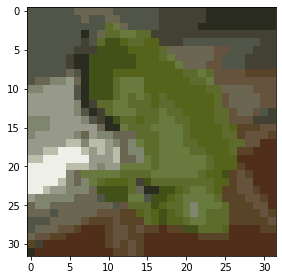

In [ ]:
import numpy as np
from skimage import io
from sklearn.cluster import KMeans

n_colors = 15

original = np.transpose(500*npimg/2+0.5, (1, 2, 0))
arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')

io.imshow(less_colors)

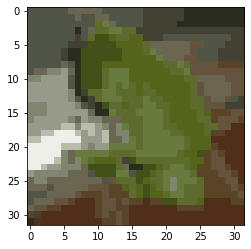

In [ ]:
lc = less_colors/255
plt.imshow(lc)

In [ ]:
lct = np.transpose((lc-0.5)*2, (2, 0, 1))
lct.shape

(3, 32, 32)

In [ ]:
qt = torch.tensor(lct, dtype=torch.float)
classes[net.identify(qt)]

'frog'